### Code from https://github.com/MengtingWan/goodreads/blob/master/samples.ipynb

In [1]:
import gzip
import json
import re
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,}'.format
%matplotlib inline

In [2]:
def load_data(file_name, head = 500):
    count = 0
    data = []
    with gzip.open(file_name) as fin:
        for l in fin:
            d = json.loads(l)
            count += 1
            data.append(d)
            
            # break if reaches the 100th line
            if (head is not None) and (count > head):
                break
    return data

In [3]:
books = load_data('goodreads_books.json.gz')
authors = load_data('goodreads_book_authors.json.gz')
works = load_data('goodreads_book_works.json.gz')
series = load_data('goodreads_book_series.json.gz')
genres = load_data('goodreads_book_genres_initial.json.gz')

In [4]:
print(' == sample record (books) ==')
display(np.random.choice(books))
print(' == sample record (authors) ==')
display(np.random.choice(authors))
print(' == sample record (works) ==')
display(np.random.choice(works))
print(' == sample record (series) ==')
display(np.random.choice(series))
print(' == sample record (series) ==')
display(np.random.choice(genres))

 == sample record (books) ==


{'isbn': '0671015311',
 'text_reviews_count': '126',
 'series': ['161229'],
 'country_code': 'US',
 'language_code': 'eng',
 'popular_shelves': [{'count': '1607', 'name': 'to-read'},
  {'count': '164', 'name': 'mystery'},
  {'count': '136', 'name': 'historical-fiction'},
  {'count': '41', 'name': 'historical'},
  {'count': '40', 'name': 'fiction'},
  {'count': '33', 'name': 'historical-mystery'},
  {'count': '25', 'name': 'series'},
  {'count': '24', 'name': 'mysteries'},
  {'count': '16', 'name': 'currently-reading'},
  {'count': '15', 'name': 'tudor'},
  {'count': '14', 'name': 'audiobook'},
  {'count': '14', 'name': 'england'},
  {'count': '13', 'name': 'historical-mysteries'},
  {'count': '10', 'name': 'owned'},
  {'count': '9', 'name': 'crime'},
  {'count': '9', 'name': '16th-century'},
  {'count': '8', 'name': 'first-in-series'},
  {'count': '8', 'name': 'ursula-blanchard'},
  {'count': '7', 'name': 'mystery-thriller'},
  {'count': '7', 'name': 'audio'},
  {'count': '7', 'name': 

 == sample record (authors) ==


{'average_rating': '3.82',
 'author_id': '2905297',
 'text_reviews_count': '43579',
 'name': 'Lauren Kate',
 'ratings_count': '907978'}

 == sample record (works) ==


{'books_count': '144',
 'reviews_count': '10794',
 'original_publication_month': '',
 'default_description_language_code': '',
 'text_reviews_count': '238',
 'best_book_id': '19336',
 'original_publication_year': '1908',
 'original_title': 'The Tale of Jemima Puddle-Duck',
 'rating_dist': '5:3275|4:2562|3:1910|2:366|1:102|total:8215',
 'default_chaptering_book_id': '',
 'original_publication_day': '',
 'original_language_id': '',
 'ratings_count': '8215',
 'media_type': 'book',
 'ratings_sum': '33187',
 'work_id': '2690022'}

 == sample record (series) ==


{'numbered': 'true',
 'note': '',
 'description': '',
 'title': 'Night Runner',
 'series_works_count': '3',
 'series_id': '433405',
 'primary_work_count': '2'}

 == sample record (series) ==


{'book_id': '2741850',
 'genres': {'fantasy, paranormal': 1758,
  'romance': 317,
  'fiction': 153,
  'mystery, thriller, crime': 38}}

In [5]:
interactions = pd.read_csv('goodreads_interactions.csv')

In [6]:
interactions.head(10)

,user_id,book_id,is_read,rating,is_reviewed
0,0,948,1,5,0
1,0,947,1,5,1
2,0,946,1,5,0
3,0,945,1,5,0
4,0,944,1,5,0
5,0,943,1,5,0
6,0,942,1,5,0
7,0,941,1,5,0
8,0,940,1,5,0
9,0,939,1,5,1


In [7]:
reviews = load_data('goodreads_reviews_dedup.json.gz')
np.random.choice(reviews)

{'user_id': '8842281e1d1347389f2ab93d60773d4d',
 'book_id': '66406',
 'review_id': '80a09fb75c693a67b392a484eac59d51',
 'rating': 4,
 'review_text': 'A very interesting WW2 book that chronicles how a gang of street orphans fought the nazis. I love to hear different perspectives, so this was very enjoyable.',
 'date_added': 'Fri Feb 09 18:27:09 -0800 2007',
 'date_updated': 'Wed Mar 22 11:45:16 -0700 2017',
 'read_at': 'Thu Jul 01 00:00:00 -0700 2004',
 'started_at': '',
 'n_votes': 0,
 'n_comments': 0}

In [8]:
spoilers = load_data('goodreads_reviews_spoiler.json.gz')
np.random.choice(spoilers)

{'user_id': '01ec1a320ffded6b2dd47833f2c8e4fb',
 'timestamp': '2014-05-04',
 'review_sentences': [[0, '4.5 stars!'],
  [0, 'Maverick.'],
  [0, 'Yes, please!'],
  [0, 'This novel starts off with a bang and hooked me from the first page.'],
  [0,
   'Maverick is a HOT AS HELL Navy SEAL, a womanizer but determined to change for Windsor.'],
  [0, 'Their relationship is romantic, sweet, scorching hot and challenging.'],
  [0,
   'There is a great cast of supporting characters and the story is very engaging.'],
  [0, 'There is also just the right amount of angst.'],
  [0,
   'Crazy Good is the perfect book when you want a steamy read with some sweet romance and emotion thrown in.'],
  [0, 'I LOVED Mav!'],
  [0,
   'Rachel Robinson is an author to watch and I look forward to reading more from her!']],
 'rating': 4,
 'has_spoiler': False,
 'book_id': '20576134',
 'review_id': '5d6496c3313da68f28227cfa842a5b1e'}

In [9]:
np_reviews = np.array(reviews)
np_spoilers = np.array(spoilers)

In [10]:
np_books = np.array(books)
np_authors = np.array(authors)
np_works = np.array(works)
np_series = np.array(series)
np_genres = np.array(genres)

### Code from https://github.com/MengtingWan/goodreads/blob/master/statistics.ipynb

In [11]:
def count_lines(file_name):
    print('counting file:', file_name)
    count = 0
    with gzip.open(file_name) as fin:
        for l in fin:
            count += 1
    print('done!')
    return count

In [12]:
n_books = count_lines('goodreads_books.json.gz')
n_works = count_lines('goodreads_book_works.json.gz')
n_authors = count_lines('goodreads_book_authors.json.gz')
n_series = count_lines('goodreads_book_series.json.gz')
n_genres = count_lines('goodreads_book_genres_initial.json.gz')
n_reviews = count_lines('goodreads_reviews_dedup.json.gz')
n_spoilers = count_lines('goodreads_reviews_spoiler.json.gz')

counting file: goodreads_books.json.gz
done!
counting file: goodreads_book_works.json.gz
done!
counting file: goodreads_book_authors.json.gz
done!
counting file: goodreads_book_series.json.gz
done!
counting file: goodreads_book_genres_initial.json.gz
done!
counting file: goodreads_reviews_dedup.json.gz
done!
counting file: goodreads_reviews_spoiler.json.gz
done!


In [13]:
n_interactions = interactions.count()
n_interactions

user_id        228648342
book_id        228648342
is_read        228648342
rating         228648342
is_reviewed    228648342
dtype: int64

In [14]:
df_book_stats = pd.DataFrame([n_books, n_works, n_authors, n_series, n_genres, n_reviews, n_spoilers],
                            dtype = float, columns = ['count'],
                            index = ['# books', '# works', '# authors', '# series', '# genres', '# reviews', '# spoilers'])
display(df_book_stats)

,count
# books,"2,360,655.0"
# works,"1,521,962.0"
# authors,"829,529.0"
# series,"400,390.0"
# genres,"2,360,655.0"
# reviews,"15,739,967.0"
# spoilers,"1,378,033.0"


# tweak this to work with interactions.csv? or email for details json?
genre_list = ['children', 'comics_graphic', 'fantasy_paranormal', 'history_biography',
              'mystery_thriller_crime', 'poetry', 'romance', 'young_adult']

def count_all_genres(genre_list):
    res = []
    for g in genre_list:
        n_book = count_lines(os.path.join('goodreads_books_'+g+'.json.gz'))
        n_shelve, n_read, n_rate, n_review, n_user = count_interactions(
            os.path.join(DIR_GENRE, 'goodreads_interactions_'+g+'.json.gz'))
        res.append([n_book, n_user, n_shelve, n_read, n_rate, n_review])
    df_stats_by_genre = pd.DataFrame(res, dtype = float, 
                                     columns = ['# book', '# user', '# shelve', '# read', '# rate', '# review'],
                                     index = genre_list)
    return df_stats_by_genre

for _t in ['# shelve', '# read', '# rate', '# review']:
    df_stats_by_genre[_t+'/'+'book'] = df_stats_by_genre[_t]/df_stats_by_genre['# book']
    df_stats_by_genre[_t+'/'+'user'] = df_stats_by_genre[_t]/df_stats_by_genre['# user']
display(df_stats_by_genre.round(2).transpose())

### Code from https://github.com/MengtingWan/goodreads/blob/master/distributions.ipynb

In [ ]:
print('=== first 5 records ===')
display(interactions.head())
print('=== duplicated records ===')
display(interactions[interactions.duplicated(['user_id', 'book_id'], keep=False)])
print('ideally you will not see any rows displayed above, then we are good now, no duplicates.')

#### # shelved = total number of records in file
#### # read =  number of records where users read the book
#### # rated = number of records where users provided rating scores for the book
#### # reviewed = number of recirds where the book recview texts are not empty

In [15]:
df_stats = pd.DataFrame([interactions.shape[0],
                         interactions['is_read'].sum(),
                         (interactions['rating']>0).sum(),
                         interactions['is_reviewed'].sum()], dtype = float, 
                        columns = ['count'],
                        index = ['# shelved', '# read', '# rated', '# reviewed'])
display(df_stats)

,count
# shelved,"228,648,342.0"
# read,"112,131,203.0"
# rated,"104,551,549.0"
# reviewed,"16,219,149.0"


In [16]:
# rating of 0 means no rating provided
df_rating_count = interactions['rating'].value_counts().astype(float)
display(df_rating_count)

0   124,096,793.0
4    37,497,451.0
5    35,506,166.0
3    23,307,457.0
2     6,189,946.0
1     2,050,529.0
Name: rating, dtype: float64

In [17]:
# visualize user/item distributions (zipf's law)
# count the number of interactions for each user/item
# count the freq of these numbers (ranks)
# plot each type of interaction
shelve_user = interactions['user_id'].value_counts().value_counts().reset_index().sort_values('index').values
read_user = interactions['user_id'].loc[interactions['is_read']>0].value_counts().value_counts().reset_index().sort_values('index').values
rate_user = interactions['user_id'].loc[interactions['rating']>0].value_counts().value_counts().reset_index().sort_values('index').values
review_user = interactions['user_id'].loc[interactions['is_reviewed']>0].value_counts().value_counts().reset_index().sort_values('index').values

shelve_book = interactions['book_id'].value_counts().value_counts().reset_index().sort_values('index').values
read_book = interactions['book_id'].loc[interactions['is_read']>0].value_counts().value_counts().reset_index().sort_values('index').values
rate_book = interactions['book_id'].loc[interactions['rating']>0].value_counts().value_counts().reset_index().sort_values('index').values
review_book = interactions['book_id'].loc[interactions['is_reviewed']>0].value_counts().value_counts().reset_index().sort_values('index').values

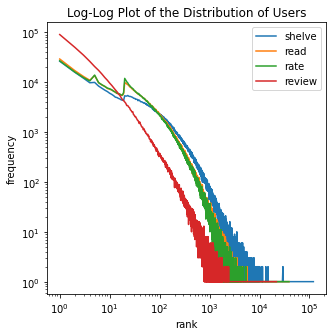

In [18]:
plt.figure(figsize=(5,5))
plt.loglog(shelve_user[:,0], shelve_user[:,1], label='shelve')
plt.loglog(read_user[:,0], read_user[:,1], label='read')
plt.loglog(rate_user[:,0], rate_user[:,1], label='rate')
plt.loglog(review_user[:,0], review_user[:,1], label='review')
plt.xlabel('rank')
plt.ylabel('frequency')
plt.title('Log-Log Plot of the Distribution of Users')
plt.legend(loc='upper right')

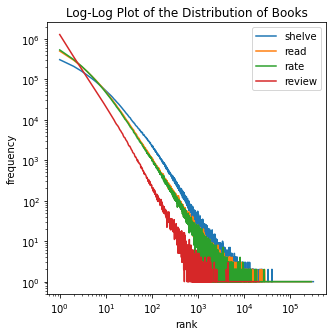

In [19]:
plt.figure(figsize=(5,5))
plt.loglog(shelve_book[:,0], shelve_book[:,1], label='shelve')
plt.loglog(read_book[:,0], read_book[:,1], label='read')
plt.loglog(rate_book[:,0], rate_book[:,1], label='rate')
plt.loglog(review_book[:,0], review_book[:,1], label='review')
plt.xlabel('rank')
plt.ylabel('frequency')
plt.title('Log-Log Plot of the Distribution of Books')
plt.legend(loc='upper right')

### Code from https://github.com/MengtingWan/goodreads/blob/master/reviews.ipynb

In [20]:
def count_reviews(file_name):
    print('counting file:', file_name)
    n_review = 0
    book_set, user_set = set(), set()
    print('current line: ', end='')
    with gzip.open(file_name) as fin:
        for l in fin:
            d = json.loads(l)
            if n_review % 1000000 == 0:
                print(n_review, end=',')
            n_review += 1
            book_set.add(d['book_id'])
            user_set.add(d['user_id'])
    print('complete')
    print('done!')
    return n_review, len(book_set), len(user_set)

In [21]:
n_review, n_book, n_user = count_reviews(os.path.join('goodreads_reviews_dedup.json.gz'))
df_stats_review = pd.DataFrame([n_review, n_book, n_user], dtype=float,
                               columns=['count'], index=['# review', '# book', '# user'])
display(df_stats_review)

counting file: goodreads_reviews_dedup.json.gz
current line: 0,1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000,11000000,12000000,13000000,14000000,15000000,complete
done!


,count
# review,"15,739,967.0"
# book,"2,080,190.0"
# user,"465,323.0"


In [22]:
def count_spoilers(file_name):
    print('counting file:', file_name)
    n_review, n_sentence, n_spoiler_review, n_spoiler_sentence = 0, 0, 0, 0
    book_set, user_set = set(), set()
    print('current line: ', end='')
    with gzip.open(file_name) as fin:
        for l in fin:
            d = json.loads(l)
            if n_review % 1000000 == 0:
                print(n_review, end=',')
            n_review += 1
            for _t, _ in d['review_sentences']:
                n_sentence += 1
                n_spoiler_sentence += _t
            n_spoiler_review += int(d['has_spoiler'])
            book_set.add(d['book_id'])
            user_set.add(d['user_id'])
    print('complete')
    print('done!')
    return n_review, n_sentence, n_spoiler_review, n_spoiler_sentence, len(book_set), len(user_set)

In [23]:
res = count_spoilers(os.path.join('goodreads_reviews_spoiler.json.gz'))
df_stats_spoiler = pd.DataFrame(res, columns=['count'], dtype=float, 
                               index=['# review', '# sentence', '# spoiler review', '# spoiler sentence',
                                      '# book', '# user'])
display(df_stats_spoiler)

counting file: goodreads_reviews_spoiler.json.gz
current line: 0,1000000,complete
done!


,count
# review,"1,378,033.0"
# sentence,"17,672,655.0"
# spoiler review,"89,627.0"
# spoiler sentence,"569,724.0"
# book,"25,475.0"
# user,"18,892.0"


### Recommendation is to start with genre specific files 
### https://sites.google.com/eng.ucsd.edu/ucsdbookgraph/home